In [1]:
from itertools import product
import random
import json
from math import ceil

import numpy as np
from tqdm import trange
import seaborn as sns
import matplotlib.pyplot as plt

np.printoptions(precision=3)

from fsa_generator import random_dpfsa, random_pfsa, geometric_sum_pfsa, random_ngram
from fsa import PFSA

In [2]:
A = random_dpfsa(
    4,
    4,
    conditions=[lambda A: 10 < A.mean_length < 80],
    mean_length=20,
    topology_seed=2,
    weight_seed=2,
)

In [3]:
A.next_symbol_entropy

np.float64(1.5371239502474114)

In [4]:
A.entropy

np.float64(32.27960295519563)

In [5]:
A

PFSA(n_states=4, n_symbols=4)

T[0]: 
[[0.         0.09577107 0.         0.        ]
 [0.         0.00612755 0.         0.        ]
 [0.         0.         0.3323994  0.        ]
 [0.         0.         0.         0.00219441]]

T[1]: 
[[0.00684758 0.         0.         0.        ]
 [0.         0.         0.82708056 0.        ]
 [0.         0.3772146  0.         0.        ]
 [0.         0.23664874 0.         0.        ]]

T[2]: 
[[0.         0.         0.         0.35845658]
 [0.         0.00612755 0.         0.        ]
 [0.         0.         0.00644622 0.        ]
 [0.09924419 0.         0.         0.        ]]

T[3]: 
[[0.         0.         0.49130572 0.        ]
 [0.11304529 0.         0.         0.        ]
 [0.         0.         0.23632073 0.        ]
 [0.         0.         0.61429361 0.        ]]

T: 
[[0.00684758 0.09577107 0.49130572 0.35845658]
 [0.11304529 0.0122551  0.82708056 0.        ]
 [0.         0.3772146  0.57516635 0.        ]
 [0.09924419 0.23664874 0.61429361 0.00219441]]

T*: 
[[ 1.68129044  5.39460492 13.3201096   0.60399503]
 [ 0.75013391  6.35367303 13.62671128  0.26948179]
 [ 0.66605238  5.64149814 14.45317356  0.23927593]
 [ 0.75518546  5.5166139  13.45470487  1.27349577]]

λ = [0. 0. 0. 1.]

ρ = [0.04761905 0.04761905 0.04761905 0.04761905]

In [6]:
[A.MI(t) for t in range(1, 20)]

[np.float64(-0.0),
 np.float64(0.5499431425727273),
 np.float64(0.3804521076694948),
 np.float64(0.20451788612066843),
 np.float64(0.09774757593643048),
 np.float64(0.04379782666779828),
 np.float64(0.01883954291032298),
 np.float64(0.007878684440655611),
 np.float64(0.00322761859156305),
 np.float64(0.0013015812566359375),
 np.float64(0.0005184004043148713),
 np.float64(0.0002044064387416885),
 np.float64(7.993181743978356e-05),
 np.float64(3.1039759608144484e-05),
 np.float64(1.1982283413000877e-05),
 np.float64(4.6019231943738685e-06),
 np.float64(1.7595622855887603e-06),
 np.float64(6.701470938196923e-07),
 np.float64(2.543491422393284e-07)]

In [7]:
[A.XXX(T) for T in range(1, 20)]

[0,
 np.float64(0.0),
 np.float64(0.24374221817070535),
 np.float64(0.3373479798164765),
 np.float64(0.36713219243677875),
 np.float64(0.37575607265753574),
 np.float64(0.37811727643229215),
 np.float64(0.3787399351770192),
 np.float64(0.37889977039796696),
 np.float64(0.3789399816265637),
 np.float64(0.3789499416990701),
 np.float64(0.37895237846220475),
 np.float64(0.37895296867843126),
 np.float64(0.3789531104566132),
 np.float64(0.37895314427734184),
 np.float64(0.3789531522974416),
 np.float64(0.3789531541895908),
 np.float64(0.37895315463401386),
 np.float64(0.378953154737991)]

In [8]:
[A.length_p(t) for t in range(1, 20)]

[np.float64(0.9523809523809526),
 np.float64(0.443213487544254),
 np.float64(0.24603822599160918),
 np.float64(0.14563133418428312),
 np.float64(0.08822602645783728),
 np.float64(0.053911437036953024),
 np.float64(0.033050629077941825),
 np.float64(0.020287044385605205),
 np.float64(0.012458482145900077),
 np.float64(0.007652286367499651),
 np.float64(0.004700542504187559),
 np.float64(0.0028874639672022335),
 np.float64(0.0017737390000073943),
 np.float64(0.0010895937681865604),
 np.float64(0.0006693298317653685),
 np.float64(0.0004111648811149932),
 np.float64(0.00025257592066981887),
 np.float64(0.00015515576428295496),
 np.float64(9.531119178404994e-05)]

In [9]:
A.mean_length

np.float64(19.999999999999993)

In [10]:
A.entropy / (A.mean_length + 1)

np.float64(1.5371239502474114)

In [11]:
A.local_entropy(m=9)

Computing 9-local entropy: 100%|██████████| 65536/65536 [00:02<00:00, 27909.45it/s]


np.float64(1.5480773055477286)

In [12]:
A.state_distribution("313")

array([0.02619491, 0.        , 0.        , 0.        ])

In [13]:
A.prefix_next_symbol_probabilities("313").sum()

np.float64(0.02619491261235785)

In [14]:
A.prefix_probability("313")

np.float64(0.026194912612357846)

In [15]:
A("313")

np.float64(0.0012473767910646592)

In [16]:
A.state_distribution("010") / A.state_distribution("010").sum()

array([0., 1., 0., 0.])

In [17]:
m_max = 6

In [18]:
Bs = [A.bos_model(b=b) for b in range(1, m_max + 1)]

In [19]:
A.next_symbol_entropy

np.float64(1.5371239502474114)

In [20]:
[A.local_entropy(m=m) for m in range(2, m_max + 1)]

Computing 6-local entropy: 100%|██████████| 1024/1024 [00:00<00:00, 15069.64it/s]


[np.float64(1.7182724187271676),
 np.float64(1.6447970962074039),
 np.float64(1.6122860579188734),
 np.float64(1.5851198607414736),
 np.float64(1.570875242381606)]

In [21]:
[Bs[m - 2].local_entropy(m=m) for m in range(2, m_max + 1)]

Computing 6-local entropy: 100%|██████████| 3125/3125 [00:00<00:00, 10254.24it/s]


[np.float64(1.7135775636340727),
 np.float64(1.6427084567494965),
 np.float64(1.608226745030354),
 np.float64(1.5831962276218412),
 np.float64(1.5696517193276447)]

In [22]:
A.local_entropy(m=4)

Computing 4-local entropy: 100%|██████████| 64/64 [00:00<00:00, 11417.93it/s]


np.float64(1.6122860579188734)

In [23]:
A.entropy

np.float64(32.27960295519563)

In [ ]:
# entropies, mean_lengths = [], []

# for t in trange(200):
#     A = random_dpfsa(
#         6,
#         10,
#         conditions=[lambda A: 10 < A.mean_length < 30],
#         mean_length=20,
#         topology_seed=2,
#         weight_seed=random.randint(0, 100000),
#         # seed=random.randint(0, 100000),
#     )
#     # A = random_dpfsa(5, 20, random.randint(0, 100000))
#     # A = random_ngram(4, 3, random.randint(0, 100000))
#     # entropies.append({m: A.local_entropy(m) for m in range(2, 4)})
#     entropies.append(A.local_entropy(3))
#     if not 0 < A.mean_length < 100:
#         # print(A.mean_length)
#         break
#     mean_lengths.append(A.mean_length)

# print(np.median(entropies))
# print(np.std(entropies))
# print(np.median(mean_lengths))
# print(np.std(mean_lengths))

100%|██████████| 200/200 [00:03<00:00, 65.91it/s]

1.9038141061786829
0.2543140951734376
19.999999999999993
3.3608370959206776e-14


In [ ]:
# def plot_distribution(x, bins=30, kde=True):
#     plt.figure(figsize=(8, 5))
#     sns.histplot(x, bins=bins, kde=kde, color="steelblue")

#     plt.xlabel("x")
#     plt.ylabel("Frequency")
#     plt.title("Distribution")
#     plt.grid(True, linestyle="--", alpha=0.6)

#     plt.show()

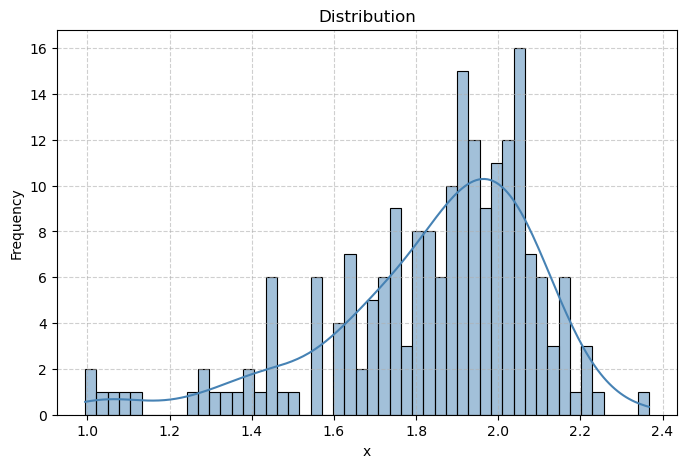

In [ ]:
# plot_distribution(entropies, bins=50, kde=True)

ValueError: Too many bins for data range. Cannot create 50 finite-sized bins.

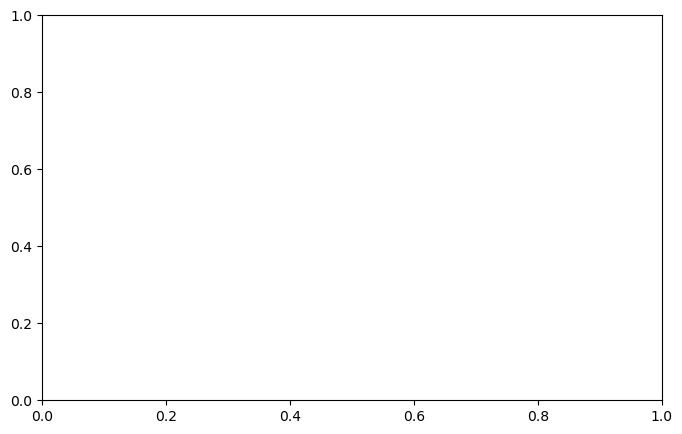

In [ ]:
# plot_distribution(mean_lengths, bins=50, kde=True)